In [33]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.cluster import silhouette_score

In [41]:
# Memuat dataset dari URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')

# Memilih fitur untuk clustering
f1 = data['alcohol'].values
f2 = data['pH'].values
X_2d = np.array(list(zip(f1, f2)))

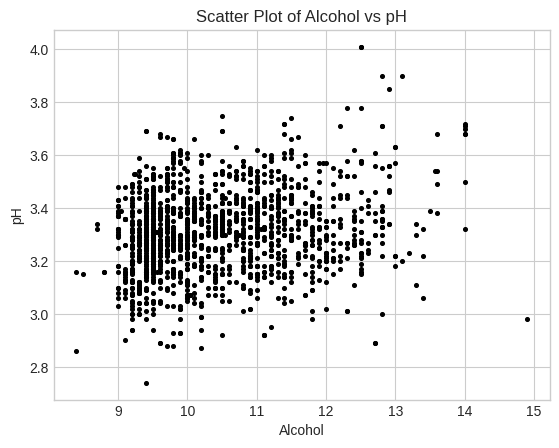

In [42]:
# Visualisasi data mentah
plt.style.use('seaborn-v0_8-whitegrid')  # Mengatur gaya plot
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Scatter Plot of Alcohol vs pH')
plt.show()


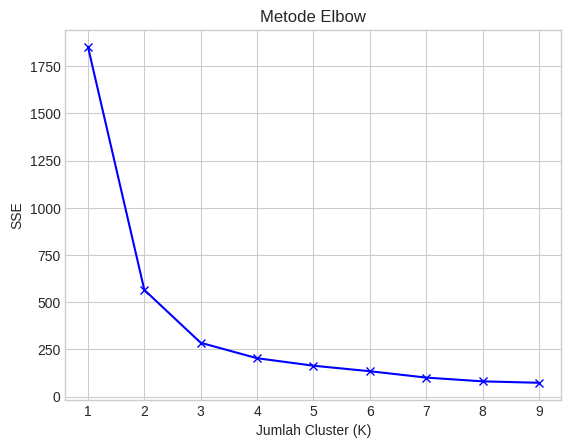

In [21]:
# Menentukan jumlah cluster optimal dengan Elbow Method
SSE = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_2d)
    SSE.append(kmeans.inertia_)

plt.plot(K, SSE, 'bx-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('SSE')
plt.title('Metode Elbow')
plt.show()

In [22]:
# Melakukan clustering dengan k optimal (contoh k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans.fit_predict(X_2d)
centroids = kmeans.cluster_centers_

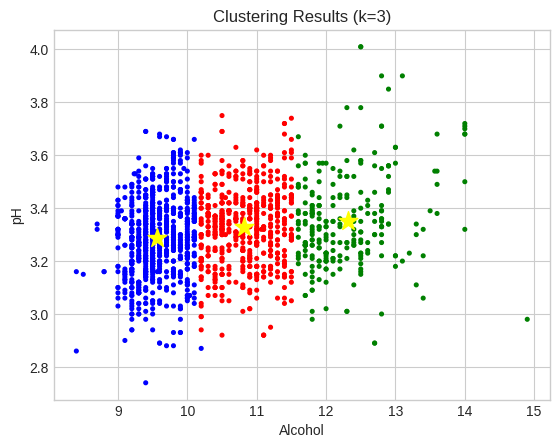

In [23]:
# Visualisasi hasil clustering
LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b'}
label_colors = [LABEL_COLOR_MAP[label] for label in labels]

plt.scatter(f1, f2, c=label_colors, s=7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='yellow')
plt.xlabel('Alcohol')
plt.ylabel('pH')
plt.title('Clustering Results (k=3)')
plt.show()

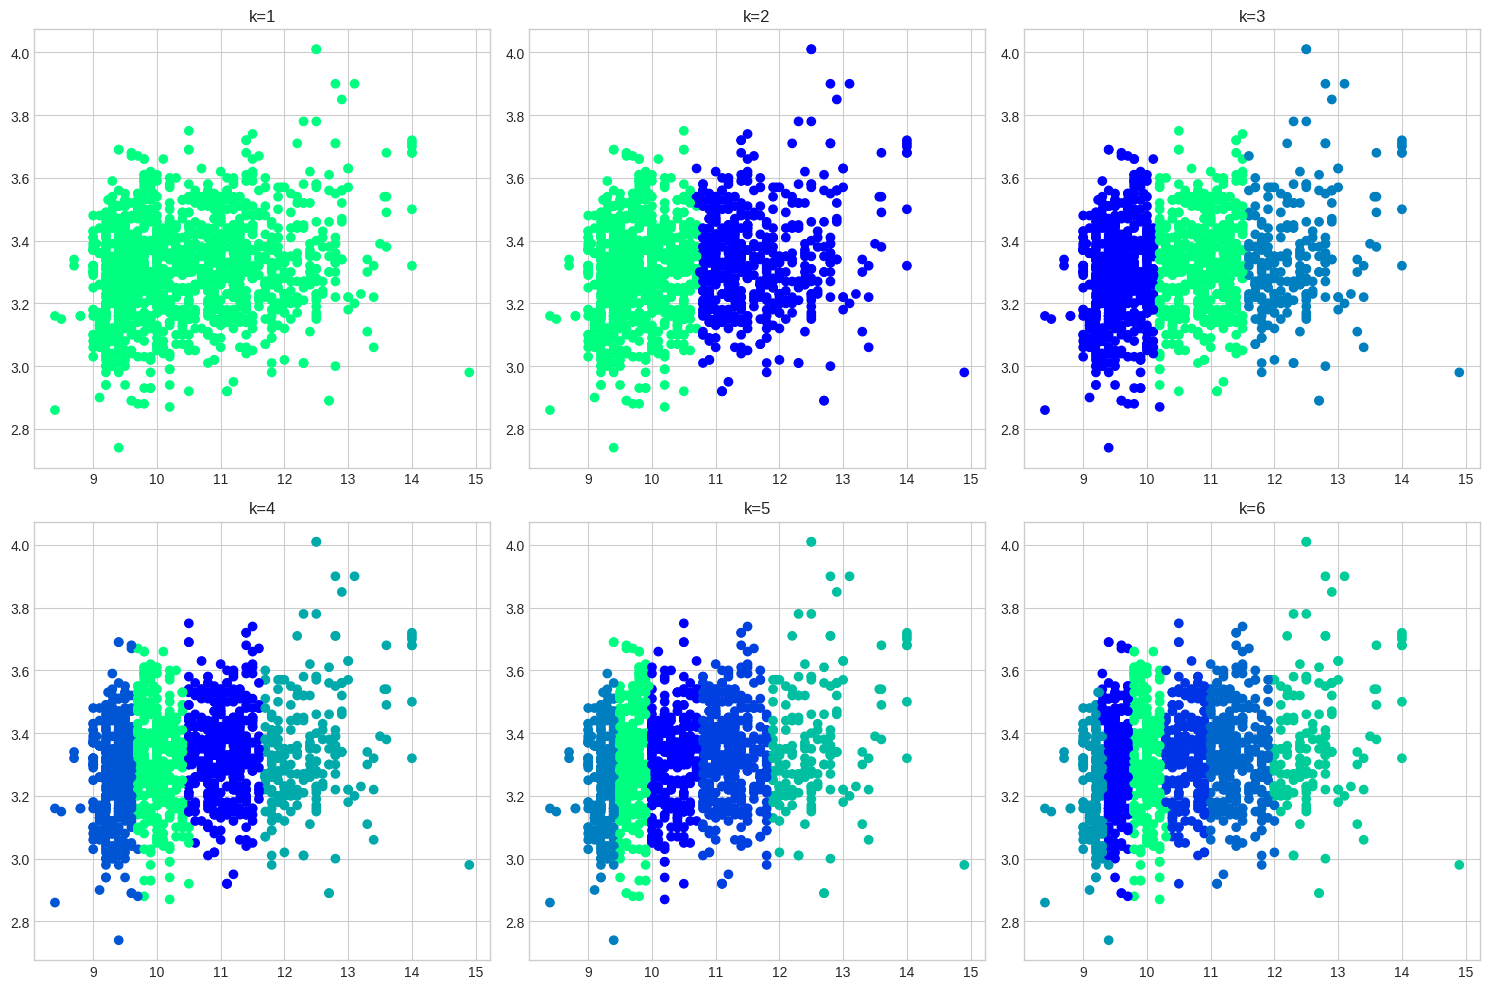

In [24]:
# Visualisasi hasil cluster untuk k=1 sampai k=6
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
K = range(1, 7)
for k in K:
    row = 0 if k < 4 else 1
    column = k - 1 if k < 4 else k - 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X_2d)
    ax[row, column].scatter(f1, f2, c=y_pred, cmap='winter_r')
    ax[row, column].set_title(f'k={k}')
plt.tight_layout()
plt.show()

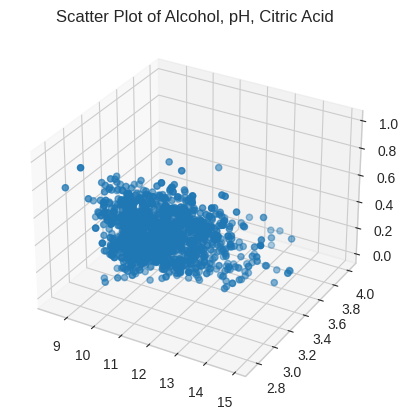

In [25]:
# 3D Clustering (contoh dataset 3D)
X_3d = np.array(data[['alcohol', 'pH', 'citric acid']])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2])
plt.title('Scatter Plot of Alcohol, pH, Citric Acid')
plt.show()

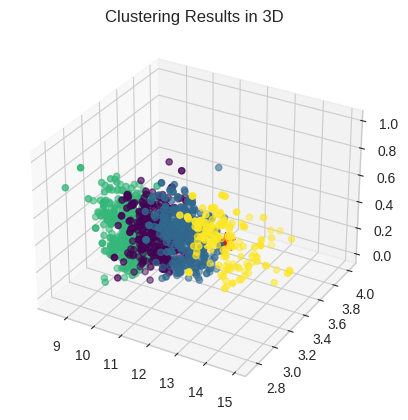

In [26]:
# KMeans clustering dalam 3D
kmeans = KMeans(n_clusters=4, random_state=42)
labels_3d = kmeans.fit_predict(X_3d)
centroids_3d = kmeans.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=labels_3d, cmap='viridis')
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], marker='*', c='red', s=200)
plt.title('Clustering Results in 3D')
plt.show()

In [37]:
## SOAL 2


In [30]:
# Evaluasi Silhouette Score
silhouette_avg = silhouette_score(X_2d, labels)
print(f"Silhouette Score for k={k_optimal}: {silhouette_avg:.2f}")

Silhouette Score for k=3: 0.57


In [31]:
# Evaluasi inertia untuk berbagai k
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_2d)
    print(f"k: {k}, inertia: {kmeans.inertia_}")

k: 1, inertia: 1852.8531557223225
k: 2, inertia: 564.9723930723492
k: 3, inertia: 285.0253340083342
k: 4, inertia: 203.21839652770876
k: 5, inertia: 163.57847789786678
k: 6, inertia: 134.32664377907574
k: 7, inertia: 100.66400920766561
k: 8, inertia: 80.71199837663166
k: 9, inertia: 73.10126250608587


In [35]:
# Menghitung silhouette score
silhouette_score(X, labels)


0.5663258027675894